In [458]:
# Importing libraries

In [546]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

In [460]:
# Loading dataset

In [461]:
df=pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [462]:
# Exploratory Data Analysis

In [463]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [464]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [465]:
df.shape

(7043, 21)

In [466]:
df.size

147903

In [467]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [468]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [470]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [471]:
df.duplicated().sum()

0

In [472]:
df['TotalCharges'].dtypes

dtype('O')

In [473]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [474]:
df['TotalCharges'].dtypes

dtype('float64')

In [475]:
categorical_features=[
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
]
numerical_features=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
target='Churn'

In [476]:
df.skew(numeric_only=True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [477]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [478]:
# Feature distribution

In [479]:
df[numerical_features].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


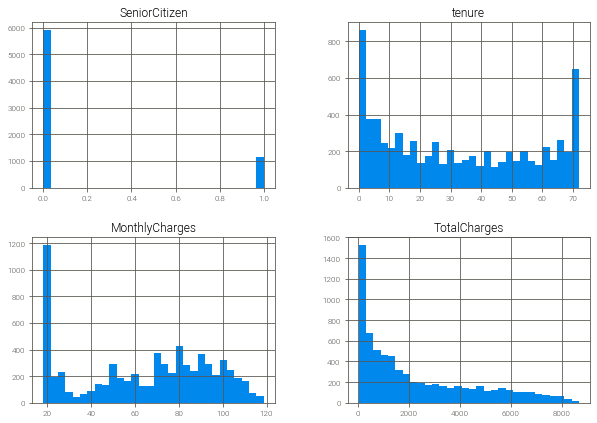

In [480]:
df[numerical_features].hist(bins=30,figsize=(10,7))
plt.show()

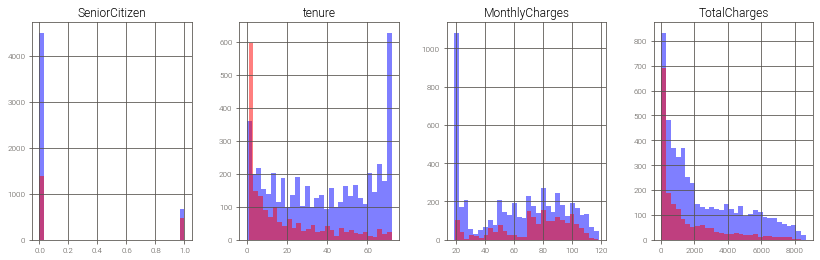

In [481]:
fig,ax=plt.subplots(1,4,figsize=(14,4))
df[df['Churn']=='No'][numerical_features].hist(bins=30,color='blue',alpha=0.5,ax=ax)
df[df['Churn']=='Yes'][numerical_features].hist(bins=30,color='red',alpha=0.5,ax=ax)
plt.show()

In [482]:
for i in categorical_features:
    print(f'{i}:{df[i].unique()}')

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [483]:
for i in categorical_features:
    df[i]=df[i].replace({'No phone service':'No','No internet service':'No'})

In [484]:
for i in categorical_features:
    print(f'{i}:{df[i].unique()}')

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


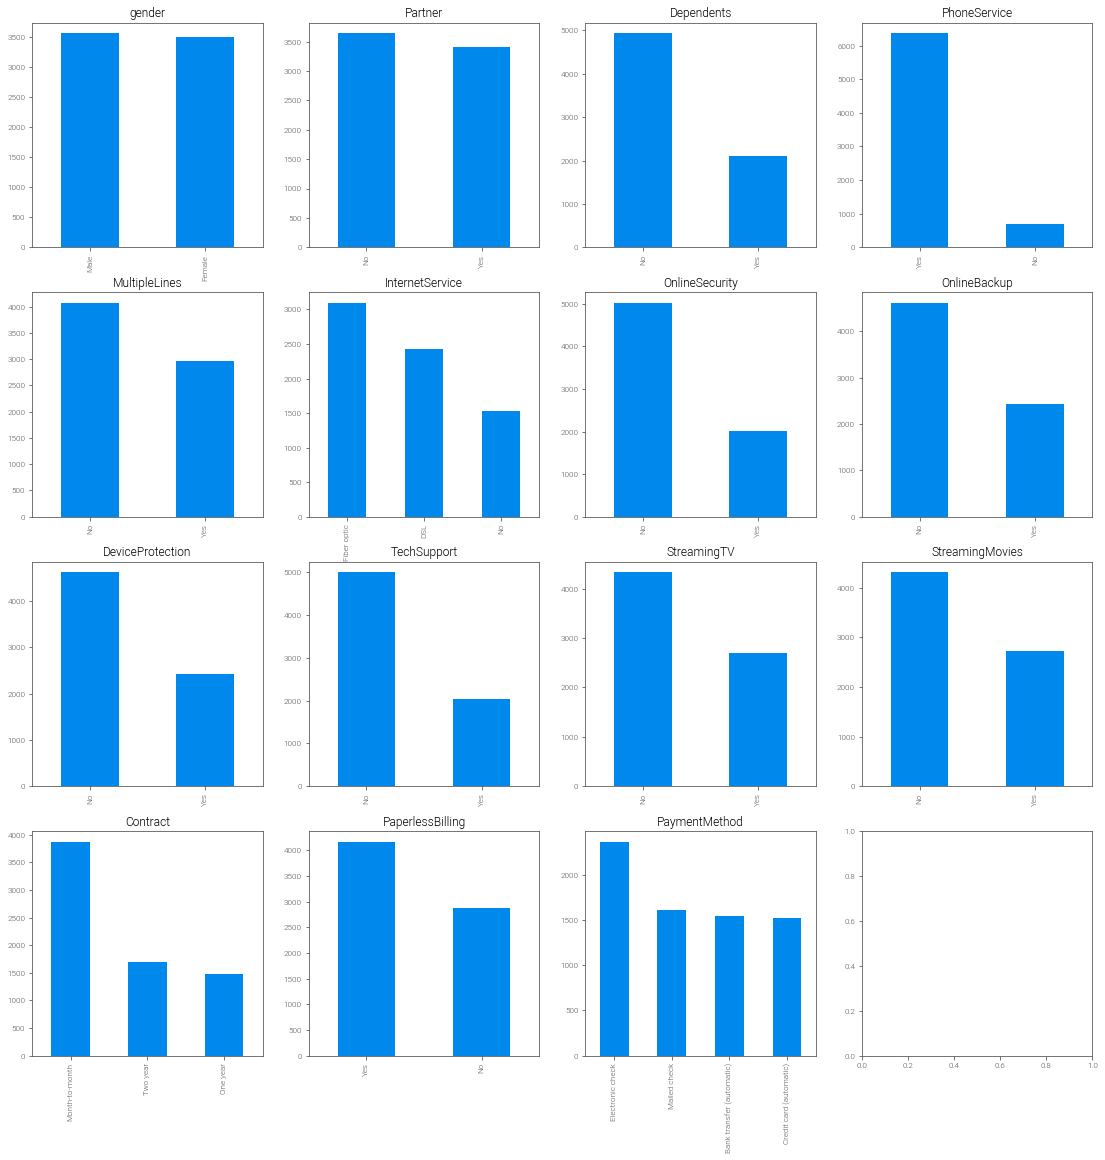

In [485]:
ROWS,COLS=4,4
fig,ax=plt.subplots(ROWS,COLS,figsize=(19,19))
row,col=0,0
for i,categorical_feature in enumerate(categorical_features):
    if col==COLS-1:
        row+=1
    col=i%COLS
    df[categorical_feature].value_counts().plot(kind='bar',ax=ax[row,col]).set_title(categorical_feature)

In [486]:
def valuecountplot(feature_name):
    fig,ax=plt.subplots(1,2,figsize=(19,7))
    df[df['Churn']=='No'][feature_name].value_counts().plot(kind='bar',ax=ax[0]).set_title('not churned')
    df[df['Churn']=='Yes'][feature_name].value_counts().plot(kind='bar',ax=ax[1]).set_title('churned')
    plt.ylabel(feature_name)

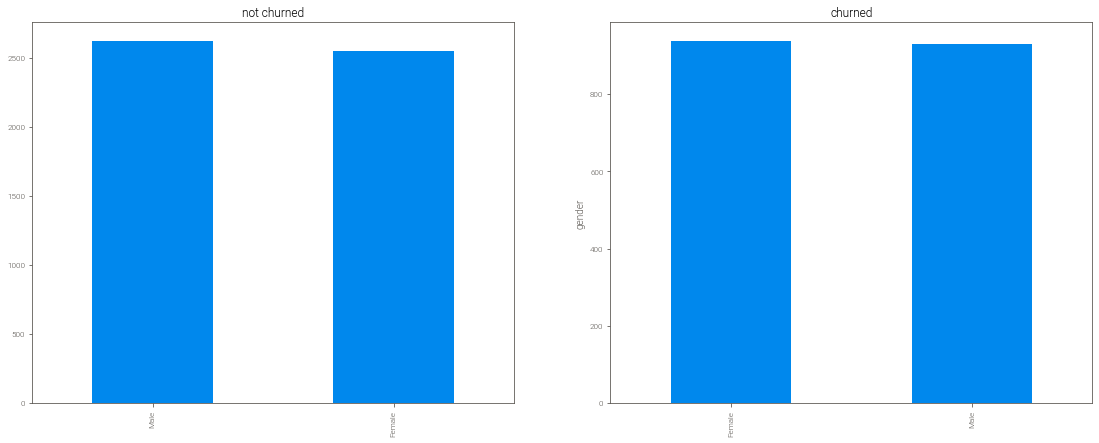

In [487]:
valuecountplot('gender')

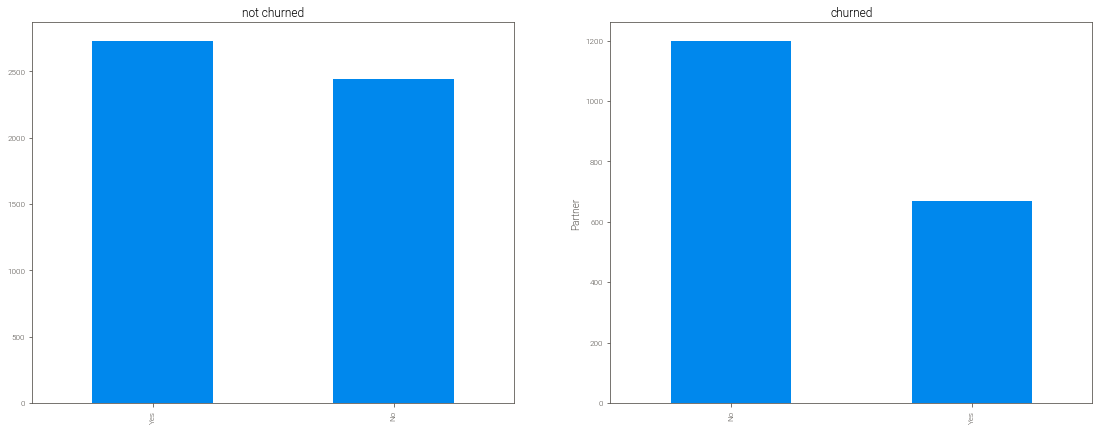

In [488]:
valuecountplot('Partner')

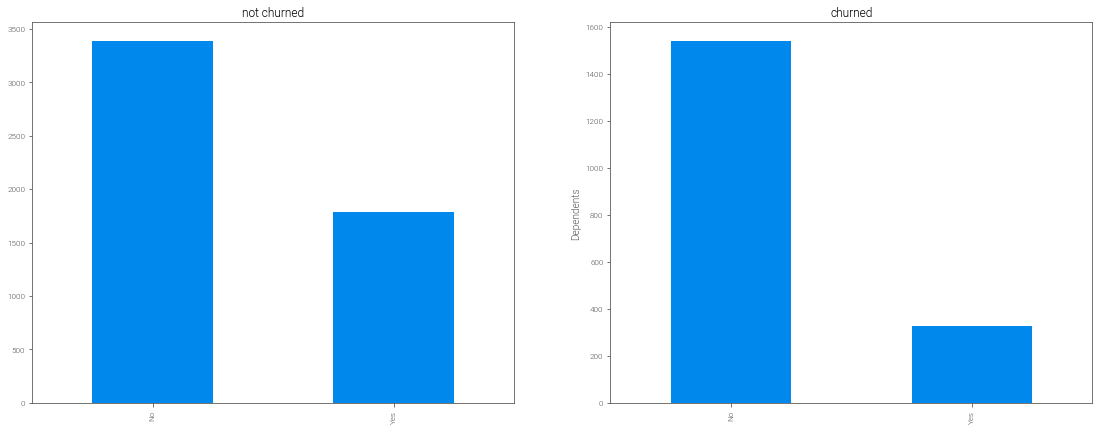

In [489]:
valuecountplot('Dependents')

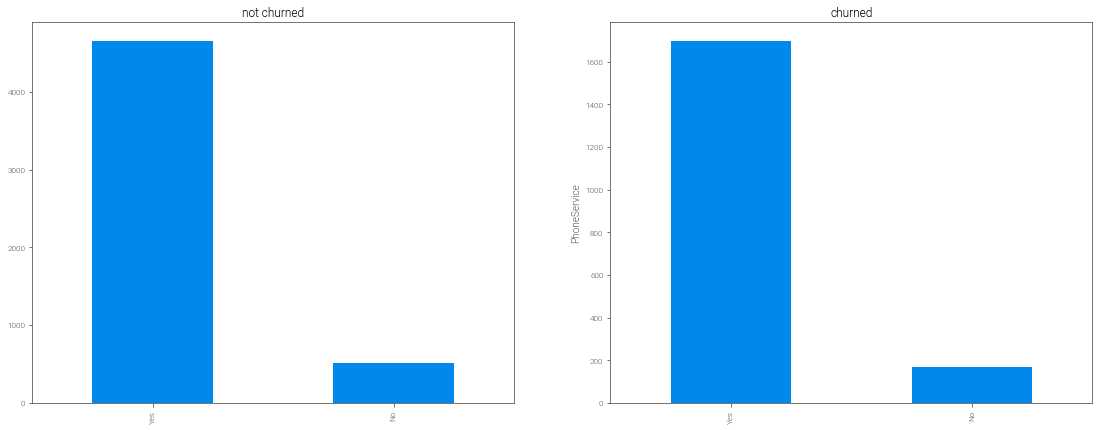

In [490]:
valuecountplot('PhoneService')

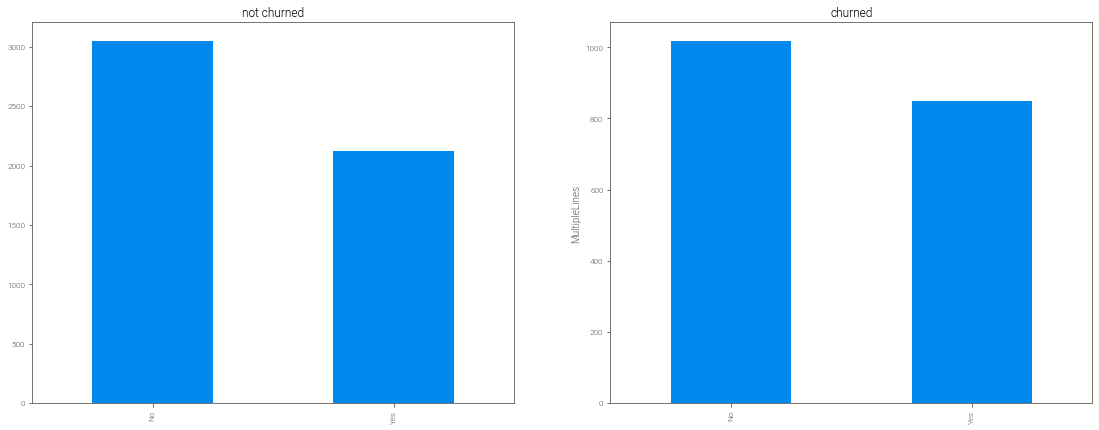

In [491]:
valuecountplot('MultipleLines')

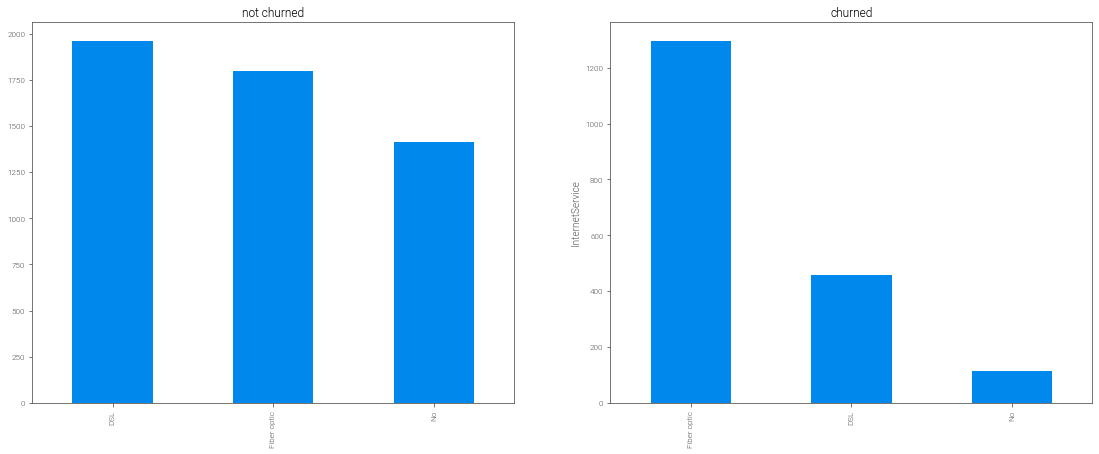

In [492]:
valuecountplot('InternetService')

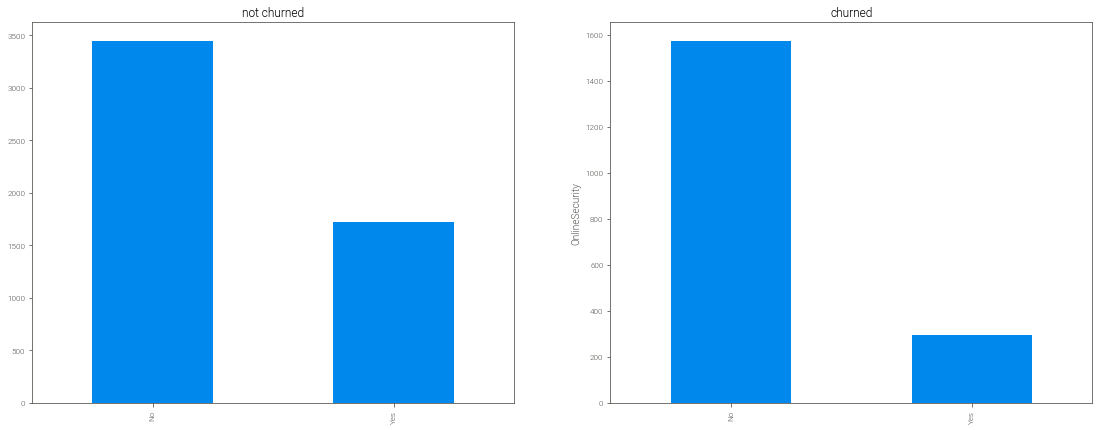

In [493]:
valuecountplot('OnlineSecurity')

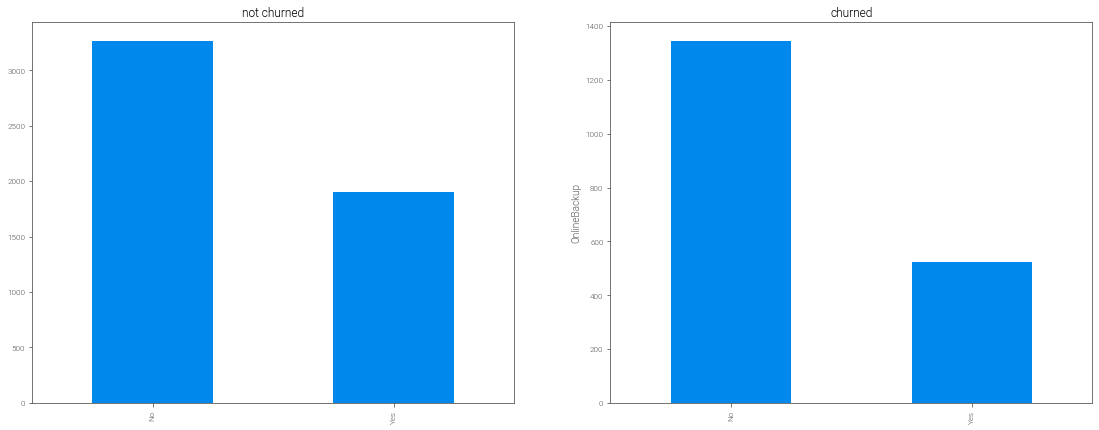

In [494]:
valuecountplot('OnlineBackup')

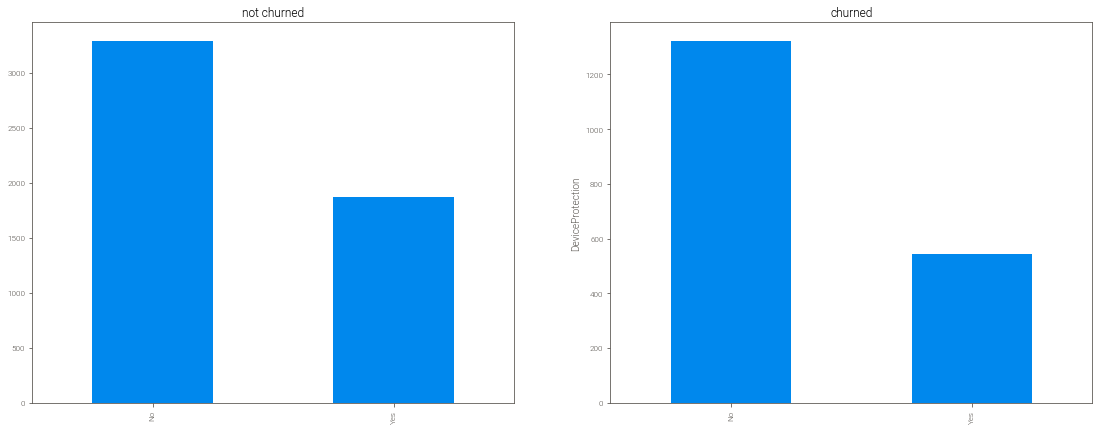

In [495]:
valuecountplot('DeviceProtection')

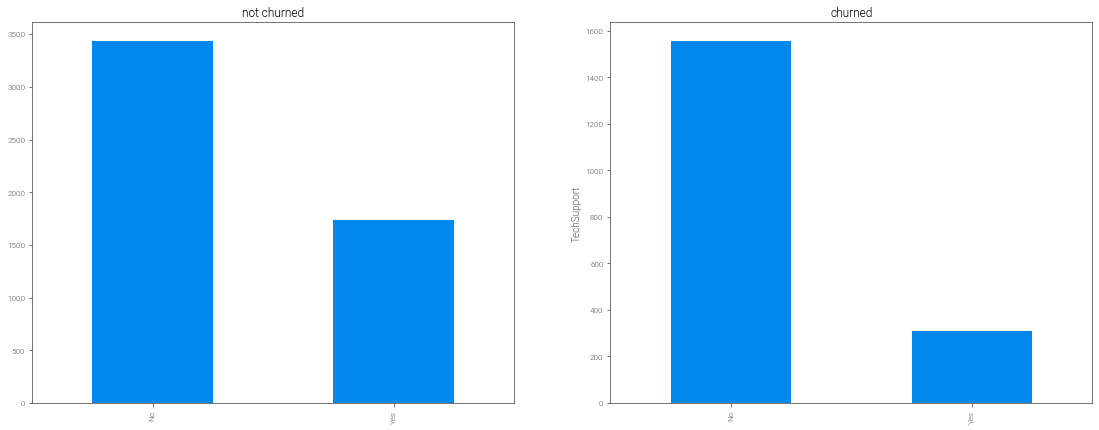

In [496]:
valuecountplot('TechSupport')

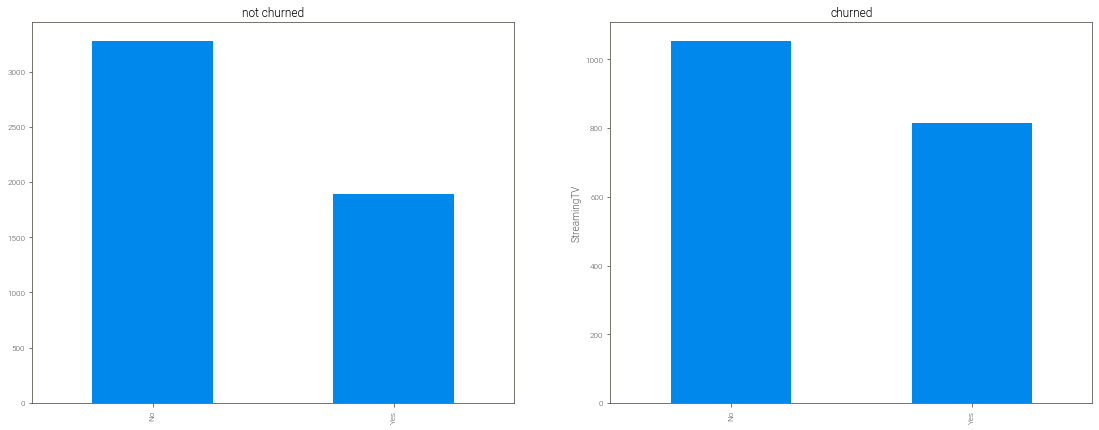

In [497]:
valuecountplot('StreamingTV')

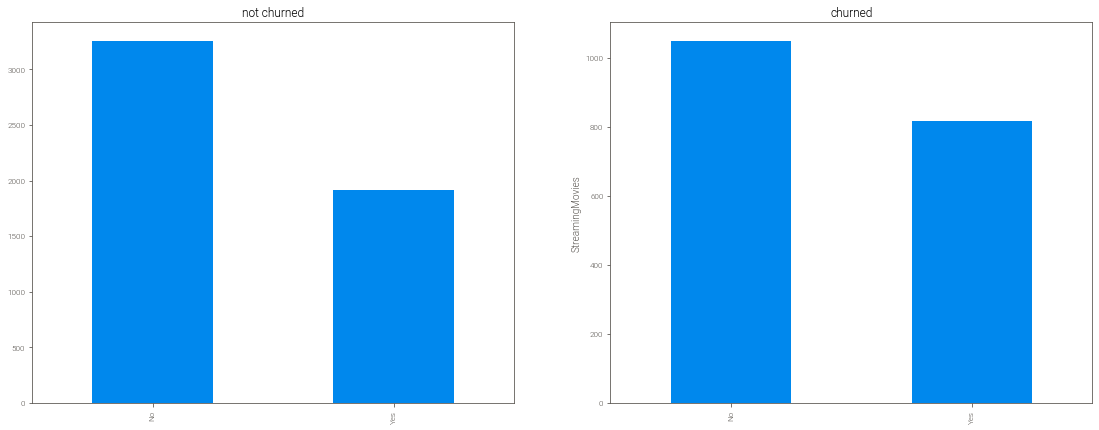

In [498]:
valuecountplot('StreamingMovies')

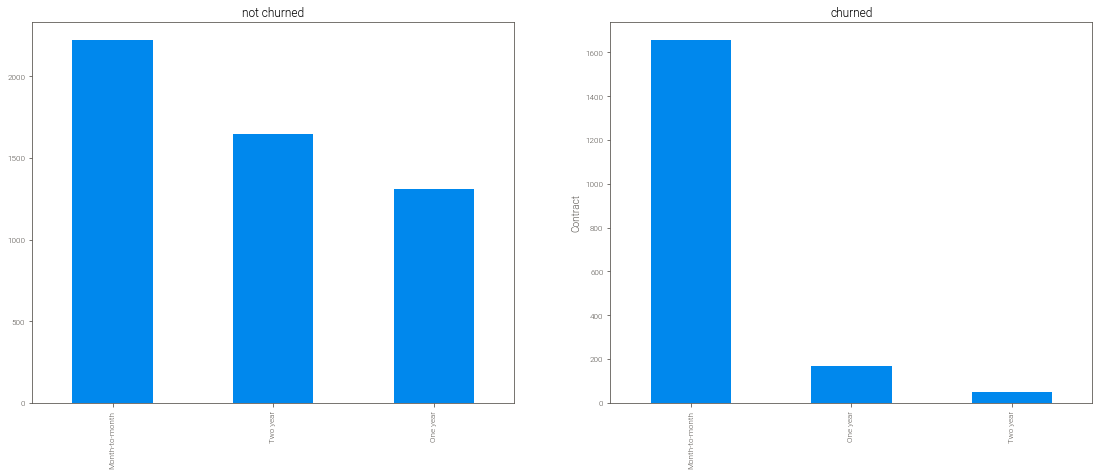

In [499]:
valuecountplot('Contract')

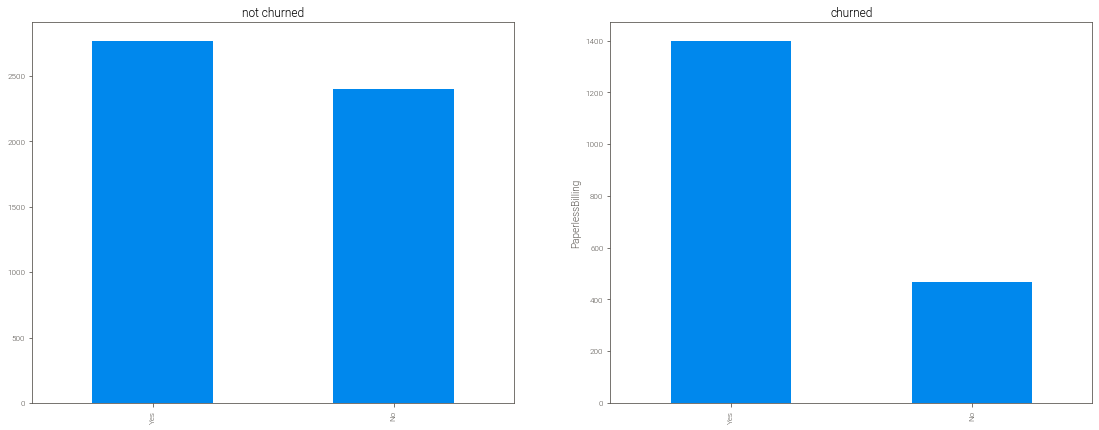

In [500]:
valuecountplot('PaperlessBilling')

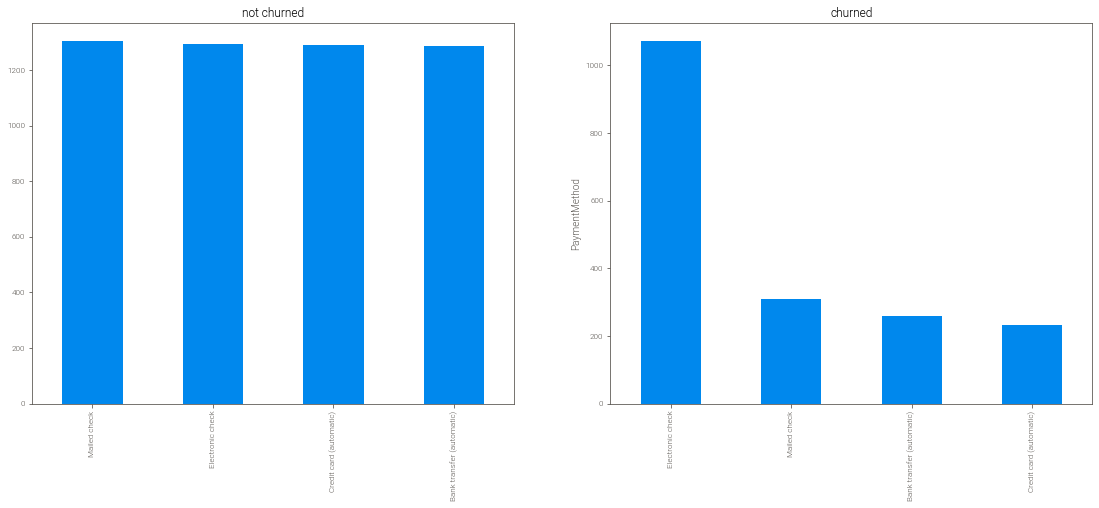

In [501]:
valuecountplot('PaymentMethod')

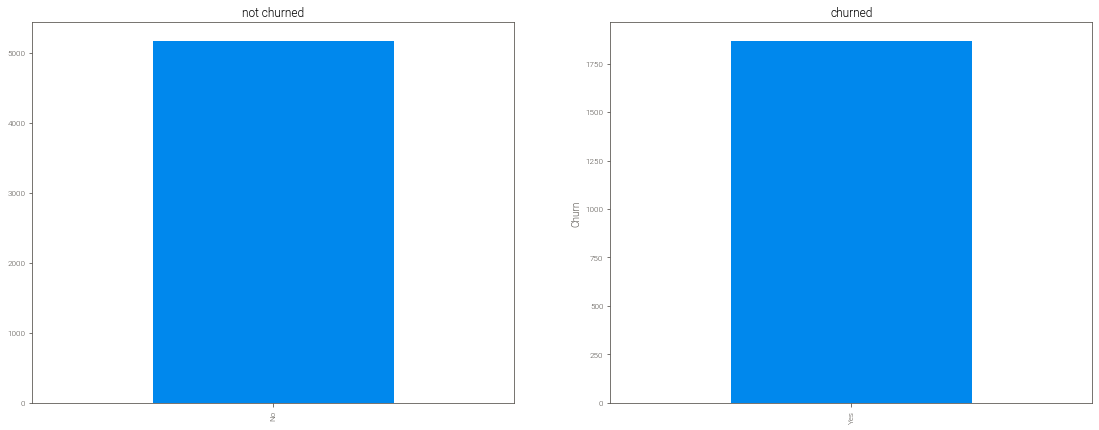

In [502]:
valuecountplot('Churn')

In [503]:
report=sv.analyze(df)
report.show_html('./report.html')

                                             |                                             | [  0%]   00:00 ->…

Report ./report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [504]:
# Outliers analysis with IQR method

In [505]:
x=['tenure','MonthlyCharges','TotalCharges']
def count_outliers(data,col):
    q1=data[col].quantile(0.25,interpolation='nearest')
    q2=data[col].quantile(0.5,interpolation='nearest')
    q3=data[col].quantile(0.75,interpolation='nearest')
    q4=data[col].quantile(1,interpolation='nearest')
    IQR=q3-q1
    global LLP
    global ULP
    LLP=q1-1.5*IQR
    ULP=q3+1.5*IQR
    if data[col].min()>LLP and data[col].max()<ULP:
        print('No outliers in',i)
    else:
        print('There are outliers in',i)
        x=data[data[col]<LLP][col].size
        y=data[data[col]>ULP][col].size
        a.append(i)
        print('Count of outliers are:',x+y)
global a
a=[]
for i in x:
    count_outliers(df,i)

No outliers in tenure
No outliers in MonthlyCharges
No outliers in TotalCharges


In [506]:
# Cleaning and Transforming data

In [507]:
df.drop('customerID',axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [508]:
s=[]
for column in df.columns:
    if df[column].dtype=='object' and df[column].nunique()==2:
        print(f'{column}:{df[column].unique()}')
        s.append(column)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
PaperlessBilling:['Yes' 'No']
Churn:['No' 'Yes']


In [509]:
s

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [510]:
for column in s:
    df[column]=df[column].replace({'Female':0,'Male':1,'No':0,'Yes':1})

In [511]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [512]:
m=[]
for column in df.columns:
    if df[column].dtype=='object' and df[column].nunique()>2:
        print(f'{column}:{df[column].unique()}')
        m.append(column)

InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [513]:
m

['InternetService', 'Contract', 'PaymentMethod']

In [514]:
df=pd.get_dummies(data=df,columns=m,drop_first=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [515]:
df.shape

(7043, 24)

In [516]:
df.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
MultipleLines                             0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check  

In [517]:
# The imputer will replace missing values with the mean of the non-missing values for the respective columns
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
df['TotalCharges']=imputer.fit_transform(df['TotalCharges'].values.reshape(-1,1))

In [518]:
df.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMeth

In [519]:
# Feature Selection

In [520]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [521]:
X.std().mean()

101.24497204185054

In [522]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [523]:
X.shape

(7043, 23)

In [524]:
# Handling imbalanced dataset using SMOTE strategy
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

In [525]:
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [526]:
X_sm.shape

(10348, 23)

In [527]:
# Feature Scaling

In [528]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_sm)

In [529]:
X_scaled

array([[-0.87015768, -0.39571303,  1.2850268 , ..., -0.4246591 ,
         1.36532115, -0.46565989],
       [ 1.149217  , -0.39571303, -0.77819389, ..., -0.4246591 ,
        -0.73242841,  2.14749009],
       [ 1.149217  , -0.39571303, -0.77819389, ..., -0.4246591 ,
        -0.73242841,  2.14749009],
       ...,
       [-0.87015768, -0.39571303, -0.77819389, ..., -0.4246591 ,
        -0.73242841, -0.46565989],
       [ 1.149217  , -0.39571303, -0.77819389, ..., -0.4246591 ,
         1.36532115, -0.46565989],
       [-0.87015768, -0.39571303,  1.2850268 , ..., -0.4246591 ,
        -0.73242841, -0.46565989]])

In [530]:
X_scaled.std().mean()

1.0000000000000002

In [531]:
y_sm

0        0
1        0
2        1
3        0
4        1
        ..
10343    1
10344    1
10345    1
10346    1
10347    1
Name: Churn, Length: 10348, dtype: int64

In [532]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_sm,test_size=0.3,random_state=44,stratify=y_sm)

In [533]:
X_train

array([[ 1.149217  , -0.39571303, -0.77819389, ..., -0.4246591 ,
        -0.73242841, -0.46565989],
       [ 1.149217  , -0.39571303, -0.77819389, ...,  2.35483005,
        -0.73242841, -0.46565989],
       [ 1.149217  , -0.39571303, -0.77819389, ..., -0.4246591 ,
        -0.73242841, -0.46565989],
       ...,
       [-0.87015768, -0.39571303, -0.77819389, ..., -0.4246591 ,
         1.36532115, -0.46565989],
       [-0.87015768, -0.39571303,  1.2850268 , ..., -0.4246591 ,
        -0.73242841,  2.14749009],
       [-0.87015768, -0.39571303,  1.2850268 , ..., -0.4246591 ,
        -0.73242841, -0.46565989]])

In [534]:
y_train

7144    1
1716    0
7940    1
5442    0
172     0
       ..
127     0
7570    1
1248    1
2357    0
8231    1
Name: Churn, Length: 7243, dtype: int64

In [535]:
y_train.shape

(7243,)

In [536]:
y_train.value_counts()

1    3622
0    3621
Name: Churn, dtype: int64

In [537]:
y_test.shape

(3105,)

In [538]:
y_test.value_counts()

0    1553
1    1552
Name: Churn, dtype: int64

In [539]:
X_train.shape

(7243, 23)

In [540]:
model=LogisticRegression()

In [541]:
model.fit(X_train,y_train)

LogisticRegression()

In [543]:
y_pred=model.predict(X_test)
y_pred[:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [544]:
y_test[:5]

5456    1
8243    1
9557    1
1243    1
3534    1
Name: Churn, dtype: int64

In [545]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1553
           1       0.83      0.83      0.83      1552

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



In [550]:
cross_val_results=cross_val_score(model,X_train,y_train,cv=10)
cross_val_results

array([0.84137931, 0.84275862, 0.82068966, 0.84668508, 0.84254144,
       0.81353591, 0.81767956, 0.83563536, 0.81353591, 0.82458564])

In [551]:
cross_val_results.mean()

0.829902648123452

In [554]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1296,  257],
       [ 267, 1285]], dtype=int64)

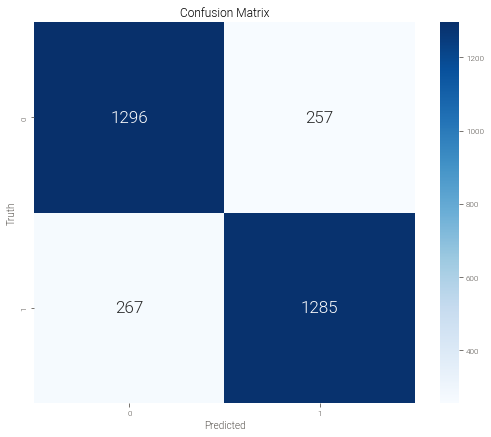

In [557]:
plt.figure(figsize=(9,7))
sns.heatmap(cm,annot=True,square=True,cbar=True,annot_kws={'size':17},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()